In [59]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

In [170]:
options = webdriver.ChromeOptions()
prefs = {'download.default_directory' : '/home/jinhyuk3me/dev_ws/eda/data',
         'download.prompt_for_dwonload': False}
options.add_experimental_option('prefs', prefs)

url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome(service=Service("/home/jinhyuk3me/dev_ws/eda/driver/chromedriver"), options=options)
driver.get(url)

In [ ]:
#driver.get(url)

In [4]:
from selenium.webdriver.common.by import By

sido = driver.find_element(By.ID, "SIDO_NM0")
sido_list = sido.find_elements(By.TAG_NAME, "option")
for idx, sido_name in enumerate(sido_list):
    print(str(idx) + ". " + sido_name.get_attribute('value'))

0. 
1. 서울특별시
2. 부산광역시
3. 대구광역시
4. 인천광역시
5. 광주광역시
6. 대전광역시
7. 울산광역시
8. 세종특별자치시
9. 경기도
10. 강원특별자치도
11. 충청북도
12. 충청남도
13. 전북특별자치도
14. 전라남도
15. 경상북도
16. 경상남도
17. 제주특별자치도


In [5]:
sido_names = [sido_name.get_attribute('value') for sido_name in sido_list]
sido_names = sido_names[1:]

In [111]:
print(len(sido_names))
sido_names

17


['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전북특별자치도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [ ]:
print(sido_names[1])
sido.send_keys(sido_names[1])

In [6]:
print(sido_names[0])
sido.send_keys(sido_names[0])

서울특별시


In [7]:
gu = driver.find_element(By.ID, "SIGUNGU_NM0")
gu_list = gu.find_elements(By.TAG_NAME, "option")

gu_names = [gu_name.get_attribute('value') for gu_name in gu_list]
print(len(gu_names), gu_names)

26 ['', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [8]:
gu_names.remove('')
print(len(gu_names), gu_names)

25 ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [9]:
gu.send_keys(gu_names[15])

In [10]:
import time
from tqdm.notebook import tqdm

for gu_name in tqdm(gu_names[:3]):
    gu = driver.find_element(By.ID, "SIGUNGU_NM0")
    gu.send_keys(gu_name)
    time.sleep(3)
    #driver.implicitly_wait(3)

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
driver.find_element(By.XPATH, """//*[@id="templ_list0"]/div[7]/div/a""").click()

---

In [ ]:
for gu_name in tqdm(gu_names):
    gu = driver.find_element(By.ID, "SIGUNGU_NM0")
    gu.send_keys(gu_name)
    driver.implicitly_wait(3)
    driver.find_element(By.XPATH, """//*[@id="templ_list0"]/div[7]/div/a""").click()

---

### 다운로드 받은거 지우기

In [184]:
from glob import glob

len(glob('/home/jinhyuk3me/dev_ws/eda/data/지역_*'))

25

In [185]:
import os

for file in glob('/home/jinhyuk3me/dev_ws/eda/data/지역_*'):
    os.remove(file)
    
len(glob('/home/jinhyuk3me/dev_ws/eda/data/지역_*'))

0

---

In [186]:
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import StaleElementReferenceException
import time

path = "/home/jinhyuk3me/dev_ws/eda/data/지역_*"

for idx, gu_name in tqdm(enumerate(gu_names), total=len(gu_names)):
    gu = driver.find_element(By.ID, "SIGUNGU_NM0")
    gu.send_keys(gu_name)
    driver.implicitly_wait(3)
    driver.refresh()
    
    save = WebDriverWait(driver, 3).until(EC.element_to_be_clickable((By.XPATH, """//*[@id="templ_list0"]/div[7]/div/a""")))
    ActionChains(driver).move_to_element(save).perform()
    save.send_keys(Keys.ENTER)
    
    while(len(glob(path)) < idx + 1):
        time.sleep(0.1)
        
    print("[" + str(idx+1) + "] " + gu_name)
    print("파일 개수: " + str(len(glob("/home/jinhyuk3me/dev_ws/eda/data/지역_*"))))
        
len(glob(path))

  0%|          | 0/25 [00:00<?, ?it/s]

[1] 강남구
파일 개수: 1
[2] 강동구
파일 개수: 2
[3] 강북구
파일 개수: 3
[4] 강서구
파일 개수: 4
[5] 관악구
파일 개수: 5
[6] 광진구
파일 개수: 6
[7] 구로구
파일 개수: 7
[8] 금천구
파일 개수: 8
[9] 노원구
파일 개수: 9
[10] 도봉구
파일 개수: 10
[11] 동대문구
파일 개수: 11
[12] 동작구
파일 개수: 12
[13] 마포구
파일 개수: 13
[14] 서대문구
파일 개수: 14
[15] 서초구
파일 개수: 15
[16] 성동구
파일 개수: 16
[17] 성북구
파일 개수: 17
[18] 송파구
파일 개수: 18
[19] 양천구
파일 개수: 19
[20] 영등포구
파일 개수: 20
[21] 용산구
파일 개수: 21
[22] 은평구
파일 개수: 22
[23] 종로구
파일 개수: 23
[24] 중구
파일 개수: 24
[25] 중랑구
파일 개수: 25


25

---

### (연습용) 무한 로딩 때문에 커스텀 timeout 에러를 추가함

In [169]:
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import StaleElementReferenceException
import time

loadingtime_limit = 20
class MyTimeoutError(Exception):
    count = 0 
    pass

for idx, gu_name in tqdm(enumerate(gu_names), total=len(gu_names)):
    while(True):
        start_time = time.time()
        driver.refresh()
        try:
            gu = driver.find_element(By.ID, "SIGUNGU_NM0")
            gu.send_keys(gu_name)
            driver.refresh()
            save = WebDriverWait(driver, timeout=30).until(EC.visibility_of_element_located((By.XPATH, """//*[@id="templ_list0"]/div[7]/div/a""")))
            ActionChains(driver).move_to_element(save).perform()
            save.send_keys(Keys.ENTER)
            while(len(glob("/home/jinhyuk3me/dev_ws/eda/data/지역_*")) <= idx):
                if time.time() - start_time > loadingtime_limit :
                    raise MyTimeoutError("로딩 시간 초과... 페이지를 새로고침합니다")
                time.sleep(0.1)
            print("[" + str(idx+1) + "] " + gu_name)
            print("파일 개수: " + str(len(glob("/home/jinhyuk3me/dev_ws/eda/data/지역_*"))))
            break;
        except MyTimeoutError as e: #------- 타임아웃 발생시 새로고침 후 다시 시도
            print("[Error] While downloading ", gu_name, ": ", e)
            driver.refresh()
            MyTimeoutError.count = MyTimeoutError.count + 1;
            continue
    
print("\n[알림] 로딩 시간 초과로 새로고침된 횟수는 총 "+ str(MyTimeoutError.count) +"회입니다." )    

  0%|          | 0/25 [00:00<?, ?it/s]

InvalidSessionIdException: Message: invalid session id
Stacktrace:
#0 0x56a24d9f146a <unknown>
#1 0x56a24d4aad23 <unknown>
#2 0x56a24d4edadf <unknown>
#3 0x56a24d522766 <unknown>
#4 0x56a24d51cdd3 <unknown>
#5 0x56a24d51c0a5 <unknown>
#6 0x56a24d473af8 <unknown>
#7 0x56a24d9b786b <unknown>
#8 0x56a24d9bb73c <unknown>
#9 0x56a24d99ef12 <unknown>
#10 0x56a24d9bc2b4 <unknown>
#11 0x56a24d9830af <unknown>
#12 0x56a24d47252b <unknown>
#13 0x7bc3ef029d90 <unknown>


---

In [178]:
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import StaleElementReferenceException
import time

loadingtime_limit = 10
class MyTimeoutError(Exception):
    count = 0 
    pass

for idx, gu_name in tqdm(enumerate(gu_names), total=len(gu_names)):
    while(True):
        start_time = time.time()
        #driver.refresh()
        try:
            gu = driver.find_element(By.ID, "SIGUNGU_NM0")
            gu.send_keys(gu_name)
            while(True):
                try:
                    save = WebDriverWait(driver, timeout=30).until(EC.visibility_of_element_located((By.XPATH, """//*[@id="templ_list0"]/div[7]/div/a""")))
                    ActionChains(driver).move_to_element(save).perform()
                    break;
                except StaleElementReferenceException :
                    time.sleep(0.1)
            while(True):
                try:
                    save = WebDriverWait(driver, timeout=30).until(EC.visibility_of_element_located((By.XPATH, """//*[@id="templ_list0"]/div[7]/div/a""")))
                    save.send_keys(Keys.ENTER)
                    break;
                except StaleElementReferenceException :
                    time.sleep(0.1)
            while(len(glob("/home/jinhyuk3me/dev_ws/eda/data/지역_*")) <= idx):
                if time.time() - start_time > loadingtime_limit :
                    raise MyTimeoutError("로딩 시간 초과... 페이지를 새로고침합니다")
                time.sleep(0.1)
            print("[" + str(idx+1) + "] " + gu_name)
            print("파일 개수: " + str(len(glob("/home/jinhyuk3me/dev_ws/eda/data/지역_*"))))
            break;
        except MyTimeoutError as e: #------- 타임아웃 발생시 새로고침 후 다시 시도
            print("[Error] While downloading ", gu_name, ": ", e)
            driver.refresh()
            MyTimeoutError.count = MyTimeoutError.count + 1;
            continue
    
print("\n[알림] 로딩 시간 초과로 새로고침된 횟수는 총 "+ str(MyTimeoutError.count) +"회입니다." )    

  0%|          | 0/25 [00:00<?, ?it/s]

[1] 강남구
파일 개수: 1
[2] 강동구
파일 개수: 2
[3] 강북구
파일 개수: 3
[4] 강서구
파일 개수: 4
[5] 관악구
파일 개수: 5
[6] 광진구
파일 개수: 6
[7] 구로구
파일 개수: 7
[8] 금천구
파일 개수: 8
[9] 노원구
파일 개수: 9
[10] 도봉구
파일 개수: 10
[11] 동대문구
파일 개수: 11
[12] 동작구
파일 개수: 12
[13] 마포구
파일 개수: 13
[14] 서대문구
파일 개수: 14
[15] 서초구
파일 개수: 15
[16] 성동구
파일 개수: 16
[17] 성북구
파일 개수: 17
[18] 송파구
파일 개수: 18
[19] 양천구
파일 개수: 19
[20] 영등포구
파일 개수: 20
[21] 용산구
파일 개수: 21
[22] 은평구
파일 개수: 22
[23] 종로구
파일 개수: 23
[24] 중구
파일 개수: 24
[25] 중랑구
파일 개수: 25

[알림] 로딩 시간 초과로 새로고침된 횟수는 총 0회입니다.


---

In [187]:
file_list = glob("/home/jinhyuk3me/dev_ws/eda/data/지역_*")
print(len(file_list))
file_list

25


['/home/jinhyuk3me/dev_ws/eda/data/지역_위치별(주유소) (16).xls',
 '/home/jinhyuk3me/dev_ws/eda/data/지역_위치별(주유소) (21).xls',
 '/home/jinhyuk3me/dev_ws/eda/data/지역_위치별(주유소) (13).xls',
 '/home/jinhyuk3me/dev_ws/eda/data/지역_위치별(주유소) (23).xls',
 '/home/jinhyuk3me/dev_ws/eda/data/지역_위치별(주유소) (7).xls',
 '/home/jinhyuk3me/dev_ws/eda/data/지역_위치별(주유소) (8).xls',
 '/home/jinhyuk3me/dev_ws/eda/data/지역_위치별(주유소) (12).xls',
 '/home/jinhyuk3me/dev_ws/eda/data/지역_위치별(주유소) (11).xls',
 '/home/jinhyuk3me/dev_ws/eda/data/지역_위치별(주유소) (1).xls',
 '/home/jinhyuk3me/dev_ws/eda/data/지역_위치별(주유소) (6).xls',
 '/home/jinhyuk3me/dev_ws/eda/data/지역_위치별(주유소) (2).xls',
 '/home/jinhyuk3me/dev_ws/eda/data/지역_위치별(주유소) (18).xls',
 '/home/jinhyuk3me/dev_ws/eda/data/지역_위치별(주유소).xls',
 '/home/jinhyuk3me/dev_ws/eda/data/지역_위치별(주유소) (10).xls',
 '/home/jinhyuk3me/dev_ws/eda/data/지역_위치별(주유소) (24).xls',
 '/home/jinhyuk3me/dev_ws/eda/data/지역_위치별(주유소) (14).xls',
 '/home/jinhyuk3me/dev_ws/eda/data/지역_위치별(주유소) (5).xls',
 '/home/jinhyuk3me/dev_ws

In [163]:
driver.close()

---

In [188]:
import pandas as pd
data = pd.read_excel(file_list[0], header=2)
data.tail(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
21,서울특별시,아이에스피시그넷㈜ 서울북부고속주유소,서울 성북구 삼양로 78,HD현대오일뱅크,02-980-1311,N,-,1899,1699,-
22,서울특별시,지에스칼텍스㈜ 세창주유소,서울 성북구 동소문로 323,GS칼텍스,02-988-2491,Y,2201,1945,1819,1546


In [189]:
data_list = []
for file in file_list:
    data = pd.read_excel(file, header=2)
    data_list.append(data)
    
oil_data = pd.concat(data_list)
len(oil_data)

422

In [166]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 422 entries, 0 to 11
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      422 non-null    object
 1   상호      422 non-null    object
 2   주소      422 non-null    object
 3   상표      422 non-null    object
 4   전화번호    422 non-null    object
 5   셀프여부    422 non-null    object
 6   고급휘발유   422 non-null    object
 7   휘발유     422 non-null    int64 
 8   경유      422 non-null    int64 
 9   실내등유    422 non-null    object
dtypes: int64(2), object(8)
memory usage: 36.3+ KB


In [193]:
oil_data = oil_data = pd.DataFrame({
    "상호": oil_data['상호'],
    '주소': oil_data['주소'],
    '가격': oil_data['휘발유'],
    '셀프': oil_data['셀프여부'],
    '상표': oil_data['상표']
})
oil_data.tail()

,상호,주소,가격,셀프,상표
7,HD현대오일뱅크(주)직영 소월길주유소,서울 용산구 소월로 66 (후암동),2291,N,HD현대오일뱅크
8,에너비스,서울 용산구 한남대로 82 (한남동),2297,N,SK에너지
9,한남지점,서울 용산구 한남대로21길 4 (한남동),2297,N,SK에너지
10,한석주유소,서울 용산구 이촌로 164,2310,N,SK에너지
11,서계주유소,서울 용산구 청파로 367 (청파동),2971,N,GS칼텍스


---

In [194]:
oil_data.reset_index(drop=True, inplace=True)
oil_data.tail()

,상호,주소,가격,셀프,상표
417,HD현대오일뱅크(주)직영 소월길주유소,서울 용산구 소월로 66 (후암동),2291,N,HD현대오일뱅크
418,에너비스,서울 용산구 한남대로 82 (한남동),2297,N,SK에너지
419,한남지점,서울 용산구 한남대로21길 4 (한남동),2297,N,SK에너지
420,한석주유소,서울 용산구 이촌로 164,2310,N,SK에너지
421,서계주유소,서울 용산구 청파로 367 (청파동),2971,N,GS칼텍스


In [195]:
oil_data['구'] = [address.split()[1] for address in oil_data['주소']]
oil_data.head()

,상호,주소,가격,셀프,상표,구
0,㈜원천주유소,서울 성북구 돌곶이로 142,1643,Y,GS칼텍스,성북구
1,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1645,Y,GS칼텍스,성북구
2,이케이에너지㈜ 강산주유소,서울 성북구 보문로 27 (보문동7가),1645,Y,GS칼텍스,성북구
3,(주)성북주유소,서울 성북구 보문로 142,1645,Y,HD현대오일뱅크,성북구
4,㈜스마일에너지 신동방주유소,서울 성북구 월계로 84 (장위동),1645,Y,S-OIL,성북구


In [196]:
oil_data['구'].unique(), len(oil_data['구'].unique())

(array(['성북구', '은평구', '서대문구', '중구', '금천구', '노원구', '마포구', '동작구', '강동구',
        '구로구', '강북구', '양천구', '강남구', '동대문구', '중랑구', '서초구', '광진구', '도봉구',
        '영등포구', '관악구', '성동구', '강서구', '송파구', '종로구', '용산구'], dtype=object),
 25)

In [197]:
oil_data['가격'] = oil_data['가격'].astype('float')

In [198]:
oil_data['가격'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 422 entries, 0 to 421
Series name: 가격
Non-Null Count  Dtype  
--------------  -----  
422 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


In [199]:
oil_data

,상호,주소,가격,셀프,상표,구
0,㈜원천주유소,서울 성북구 돌곶이로 142,1643.0,Y,GS칼텍스,성북구
1,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1645.0,Y,GS칼텍스,성북구
2,이케이에너지㈜ 강산주유소,서울 성북구 보문로 27 (보문동7가),1645.0,Y,GS칼텍스,성북구
3,(주)성북주유소,서울 성북구 보문로 142,1645.0,Y,HD현대오일뱅크,성북구
4,㈜스마일에너지 신동방주유소,서울 성북구 월계로 84 (장위동),1645.0,Y,S-OIL,성북구
...,...,...,...,...,...,...
417,HD현대오일뱅크(주)직영 소월길주유소,서울 용산구 소월로 66 (후암동),2291.0,N,HD현대오일뱅크,용산구
418,에너비스,서울 용산구 한남대로 82 (한남동),2297.0,N,SK에너지,용산구
419,한남지점,서울 용산구 한남대로21길 4 (한남동),2297.0,N,SK에너지,용산구
420,한석주유소,서울 용산구 이촌로 164,2310.0,N,SK에너지,용산구


<Axes: title={'center': '가격'}, xlabel='셀프'>

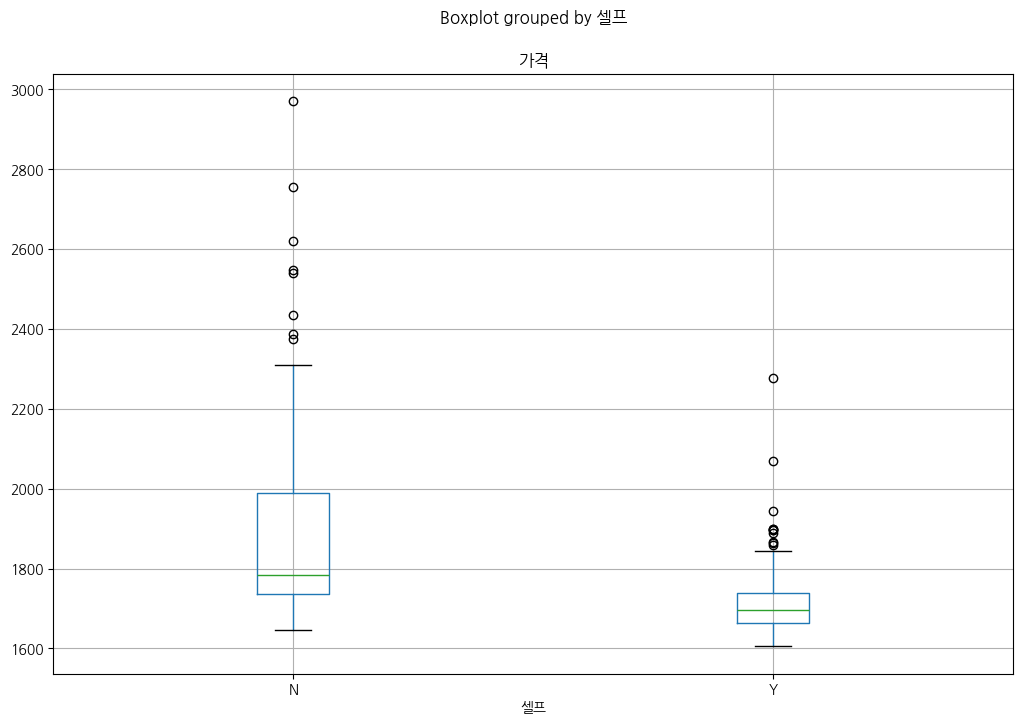

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

oil_data.boxplot(column='가격', by='셀프', figsize=(12,8))

/tmp/ipykernel_54888/531846660.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='셀프', y='가격', data=oil_data, palette="Set1")


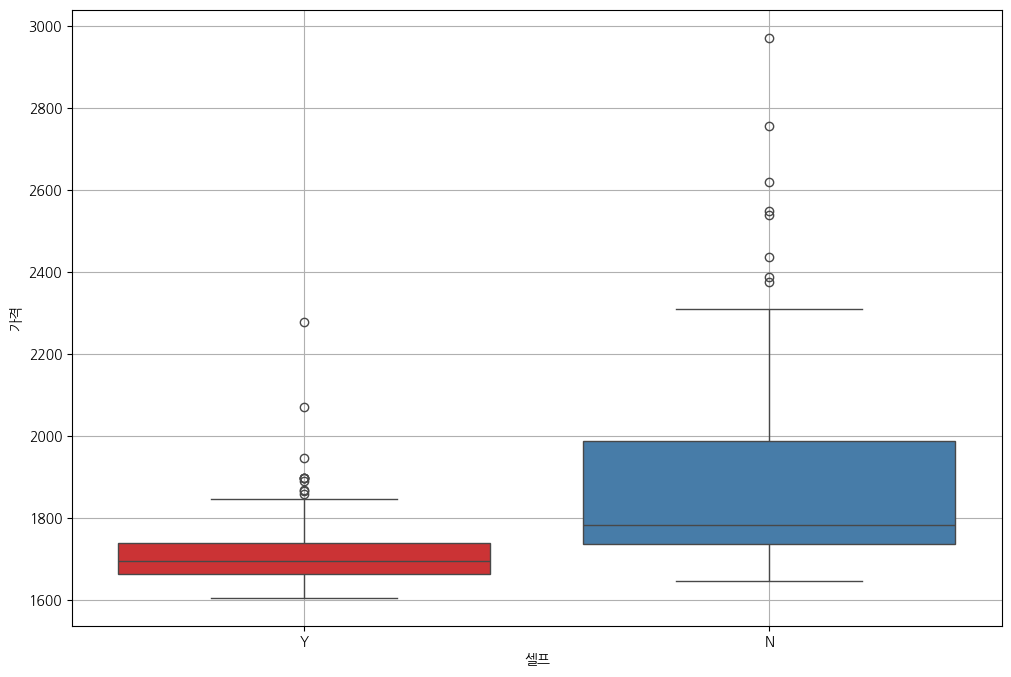

In [203]:
plt.figure(figsize=(12,8))
sns.boxplot(x='셀프', y='가격', data=oil_data, palette="Set1")
plt.grid(True)
plt.show()

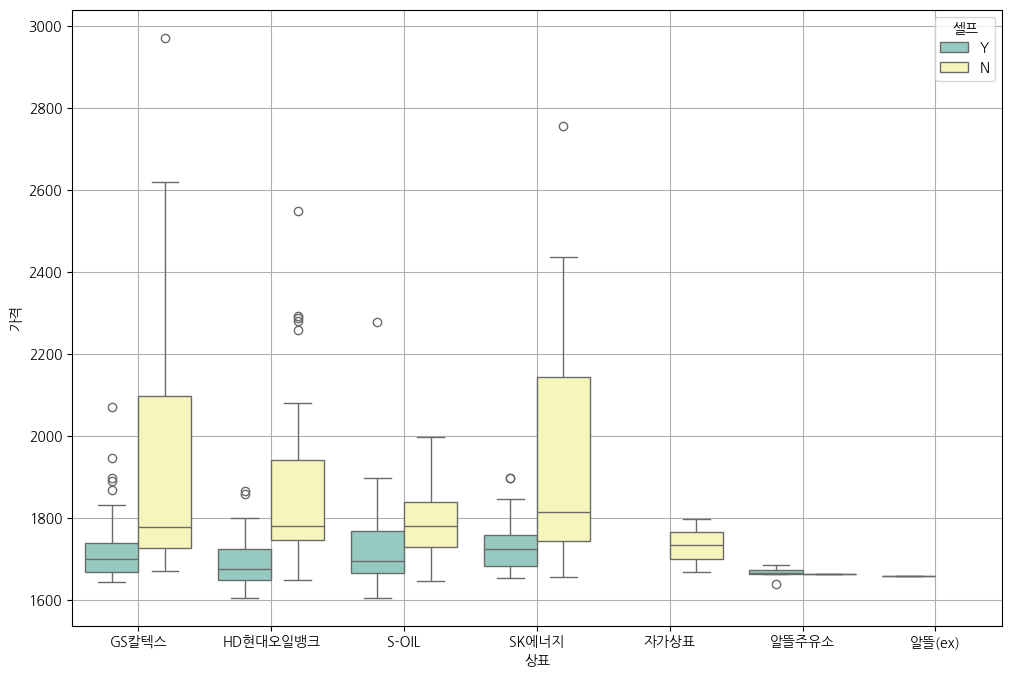

In [204]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=oil_data, palette="Set3")
plt.grid(True)
plt.show()

---

In [206]:
import json
import folium

#FutureWarning을 무시하도록 설정하는 역할을 합니다.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [207]:
import numpy as np

gu_data = pd.pivot_table(data=oil_data, index='구', values='가격', aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1959.000000
강동구,1797.461538
강북구,1675.300000
강서구,1717.878788
관악구,1770.142857


In [210]:
import folium

geo_path = "/home/jinhyuk3me/dev_ws/eda/data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles='OpenStreetMap')
setting = folium.Choropleth(
    geo_data=geo_str,
    data=gu_data,
    columns=[gu_data.index, '가격'],
    #key_on='feature.id',
    key_on="feature.properties.name",
    fill_color="PuRd"
)
setting.add_to(map)
map